# ALCHEMY OF REAL ESTATE VALUE

## 1. Business Understanding:

For zillow , the project centers on addressing the practical challenge of identifying optimal real estate investment opportunities in a dynamic market. The core objective is to empower decision-makers with data-driven insights, enabling them to make informed investment choices. By prioritizing profit optimization, risk mitigation, and ROI enhancement, the project directly serves the needs of the investment firm. The outcomes of this analysis have broader implications for professionals and participants in the real estate market, contributing valuable insights to guide their actions. This approach ensures that the project provides relevant, actionable, and meaningful results, aligning with the checklist's criteria for business understanding.

### a) Introduction:

Zillow, the top U.S. real estate website, provides end-to-end services—buying, selling, renting, financing—with transparency and ease. Our affiliated lender, Zillow Home Loans, boosts our ability to offer insights to the investment firm.

### b) Problem Statement
This project seeks to identify high-potential real estate investments for a fictional investment firm. The task involves optimizing profit while managing risk, ensuring a favorable ROI. Decision-makers in a dynamic real estate market require data-driven insights for informed investments. The project's objective is to empower executives, maximizing returns for the firm and benefiting the broader real estate market.

### c) Data Relevance
Each row in the dataset corresponds to a unique zip code and contains comprehensive location details along with the median housing sales prices for each month.

The dataset consists of a total of 14,723 rows and encompasses 272 different variables:

* RegionID: A unique identifier ranging from 58196 to 753844.
* RegionName: A unique Zip Code, varying between 1001 and 99901.
* City: The city in which the respective zip code is situated.
* State: The state where the zip code is located.
* Metro: The metropolitan area encompassing the zip code.
* CountyName: The county within which the zip code falls.
* SizeRank: A numerical ranking reflecting the size of the zip code, ranked from 1 to 14723.
* 1996-04 through 2018-04: These columns represent the median housing sales values for each month, from April 1996 through April 2018, amounting to 265 data points of monthly data for each zip code.

### 3. Data Understanding

In [3]:
# Import relevant libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from statsmodels.tsa.stattools import adfuller

In [2]:
# Importing the data from the csv 
df = pd.read_csv('zillow_data.csv')

# Examining the first five rows of our dataframe
df.head(10)

,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,...,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04
0,84654,60657,Chicago,IL,Chicago,Cook,1,334200.0,335400.0,336500.0,...,1005500,1007500,1007800,1009600,1013300,1018700,1024400,1030700,1033800,1030600
1,90668,75070,McKinney,TX,Dallas-Fort Worth,Collin,2,235700.0,236900.0,236700.0,...,308000,310000,312500,314100,315000,316600,318100,319600,321100,321800
2,91982,77494,Katy,TX,Houston,Harris,3,210400.0,212200.0,212200.0,...,321000,320600,320200,320400,320800,321200,321200,323000,326900,329900
3,84616,60614,Chicago,IL,Chicago,Cook,4,498100.0,500900.0,503100.0,...,1289800,1287700,1287400,1291500,1296600,1299000,1302700,1306400,1308500,1307000
4,93144,79936,El Paso,TX,El Paso,El Paso,5,77300.0,77300.0,77300.0,...,119100,119400,120000,120300,120300,120300,120300,120500,121000,121500
5,91733,77084,Houston,TX,Houston,Harris,6,95000.0,95200.0,95400.0,...,157900,158700,160200,161900,162800,162800,162800,162900,163500,164300
6,61807,10467,New York,NY,New York,Bronx,7,152900.0,152700.0,152600.0,...,394400,400000,407300,411600,413200,414300,413900,411400,413200,417900
7,84640,60640,Chicago,IL,Chicago,Cook,8,216500.0,216700.0,216900.0,...,798000,787100,776100,774900,777900,777900,778500,780500,782800,782800
8,91940,77449,Katy,TX,Houston,Harris,9,95400.0,95600.0,95800.0,...,166800,167400,168400,169600,170900,172300,173300,174200,175400,176200
9,97564,94109,San Francisco,CA,San Francisco,San Francisco,10,766000.0,771100.0,776500.0,...,3767700,3763900,3775000,3799700,3793900,3778700,3770800,3763100,3779800,3813500


In [3]:
df.shape

(14723, 272)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14723 entries, 0 to 14722
Columns: 272 entries, RegionID to 2018-04
dtypes: float64(219), int64(49), object(4)
memory usage: 30.6+ MB


In [6]:
# list columns that are of the ‘object’ type
df.select_dtypes(include=['object']).columns.tolist()

['City', 'State', 'Metro', 'CountyName']

### Observation
* Data appears to be sorted by SizeRank, largest to smallest
* Most column names will be changed to datetime
* The dataset has missing values

In [62]:
# Print the frequency of each unique RegionName in the dataframe
print(df.RegionName.value_counts())

# Print the number of unique RegionNames in the dataframe
print(df.RegionName.nunique())

# Print the smallest RegionName in the dataframe
print(df.RegionName.min())

# Print the largest RegionName in the dataframe
print(df.RegionName.max())

60657    1
7764     1
1226     1
13624    1
45335    1
        ..
22556    1
33761    1
38242    1
33602    1
89155    1
Name: RegionName, Length: 14723, dtype: int64
14723
1001
99901


### Observation
* From the boxplot, we see outliers mostly in NY state and CA state since they extreme values 

In [65]:
print(df.describe())

            RegionID    RegionName      SizeRank       1996-04       1996-05  \
count   14723.000000  14723.000000  14723.000000  1.368400e+04  1.368400e+04   
mean    81075.010052  48222.348706   7362.000000  1.182991e+05  1.184190e+05   
std     31934.118525  29359.325439   4250.308342  8.600251e+04  8.615567e+04   
min     58196.000000   1001.000000      1.000000  1.130000e+04  1.150000e+04   
25%     67174.500000  22101.500000   3681.500000  6.880000e+04  6.890000e+04   
50%     78007.000000  46106.000000   7362.000000  9.950000e+04  9.950000e+04   
75%     90920.500000  75205.500000  11042.500000  1.432000e+05  1.433000e+05   
max    753844.000000  99901.000000  14723.000000  3.676700e+06  3.704200e+06   

            1996-06       1996-07       1996-08       1996-09       1996-10  \
count  1.368400e+04  1.368400e+04  1.368400e+04  1.368400e+04  1.368400e+04   
mean   1.185374e+05  1.186531e+05  1.187803e+05  1.189275e+05  1.191205e+05   
std    8.630923e+04  8.646795e+04  8.66509

In [ ]:
# Find the zips with the least data
for col in reversed(zillow.columns):
    if zillow[col].isna().sum() >0:
        print(col)
        break
    
# 56 zip codes only go back to 07-2014
zillow[zillow['2014-06'].isna()]

### 4. Data Preparation

In [7]:
# Check for missing and duplicate values
print(df.isnull().sum())
print(df.duplicated().sum())

RegionID         0
RegionName       0
City             0
State            0
Metro         1043
              ... 
2017-12          0
2018-01          0
2018-02          0
2018-03          0
2018-04          0
Length: 272, dtype: int64
0


In [8]:
# list columns with null values
df.columns[df.isna().any()].tolist()

['Metro',
 '1996-04',
 '1996-05',
 '1996-06',
 '1996-07',
 '1996-08',
 '1996-09',
 '1996-10',
 '1996-11',
 '1996-12',
 '1997-01',
 '1997-02',
 '1997-03',
 '1997-04',
 '1997-05',
 '1997-06',
 '1997-07',
 '1997-08',
 '1997-09',
 '1997-10',
 '1997-11',
 '1997-12',
 '1998-01',
 '1998-02',
 '1998-03',
 '1998-04',
 '1998-05',
 '1998-06',
 '1998-07',
 '1998-08',
 '1998-09',
 '1998-10',
 '1998-11',
 '1998-12',
 '1999-01',
 '1999-02',
 '1999-03',
 '1999-04',
 '1999-05',
 '1999-06',
 '1999-07',
 '1999-08',
 '1999-09',
 '1999-10',
 '1999-11',
 '1999-12',
 '2000-01',
 '2000-02',
 '2000-03',
 '2000-04',
 '2000-05',
 '2000-06',
 '2000-07',
 '2000-08',
 '2000-09',
 '2000-10',
 '2000-11',
 '2000-12',
 '2001-01',
 '2001-02',
 '2001-03',
 '2001-04',
 '2001-05',
 '2001-06',
 '2001-07',
 '2001-08',
 '2001-09',
 '2001-10',
 '2001-11',
 '2001-12',
 '2002-01',
 '2002-02',
 '2002-03',
 '2002-04',
 '2002-05',
 '2002-06',
 '2002-07',
 '2002-08',
 '2002-09',
 '2002-10',
 '2002-11',
 '2002-12',
 '2003-01',
 '2003

In [9]:
# Drop null values for the ‘Metro’ column
df = df.dropna(subset=['Metro'])

In [ ]:
#Drop columns we dont need
df.drop(['RegionID', 'SizeRank'], axis=1,inplace=True)

### 5. Exploratory Data Analysis

In [71]:
# Calculate 4-year ROI for each zip code
df['4_yr_ROI'] = (df['2018-04'] - df['2014-07']) / df['2014-07']

# Identify top 5 zip codes with highest ROI
top_5_zipcodes = df.nlargest(5, '4_yr_ROI')

# Print the top 5 zip codes
print(top_5_zipcodes['RegionName'])

6563    15201
4554    33805
6105    37210
3229    32117
2347    32205
Name: RegionName, dtype: int64


### 6. Modellling

#### Time series analysis

##### Creating ROI, Mean and Standard deviation

In [ ]:
#Calculate ROI percentage

df['ROI']= ( (df['2021-09-30']/df['2000-01-31'])-1 ) *100 

#Calculate standard deviation of monthly values
df['std']=df.loc[:,'2000-01-31':'2021-09-30'].std(skipna=True, axis=1)

#Calculate historical mean value
df['mean']=df.loc[:,'2000-01-31':'2021-09-30'].mean(skipna=True, axis=1)

In [ ]:
# Show the first 5 rows of the new data
df[['std','mean','ROI']].head()

In [6]:
# Reshape from wide format to long format
def melt_data(df):
    """
    Takes the zillow_data dataset in wide form or a subset of the zillow_dataset.  
    Returns a long-form datetime dataframe 
    with the datetime column names as the index and the values as the 'values' column.
    
    If more than one row is passes in the wide-form dataset, the values column
    will be the mean of the values from the datetime columns in all of the rows.
    """
    
    melted = pd.melt(df, id_vars=['RegionName', 'RegionID', 'SizeRank', 'City', 'State', 'Metro', 'CountyName'], var_name='time')
    melted['time'] = pd.to_datetime(melted['time'], infer_datetime_format=True)
    melted = melted.dropna(subset=['value'])
    return melted.groupby('time').aggregate({'value':'mean'})

In [7]:
melted_df = melt_data(df)
melted_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 265 entries, 1996-04-01 to 2018-04-01
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   value   265 non-null    float64
dtypes: float64(1)
memory usage: 4.1 KB


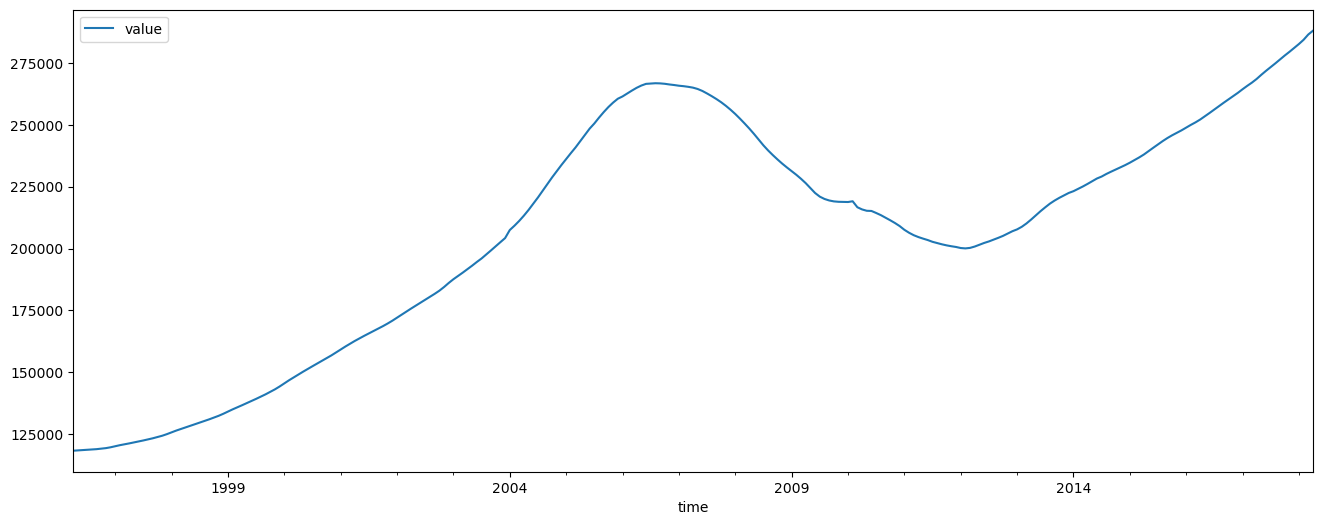

In [15]:
melted_df.plot(figsize = (16, 6));

In [11]:
# function that performs stationarity checks on a time series
def stationarity_check(TS):
    
    # Import adfuller
    from statsmodels.tsa.stattools import adfuller
    
    # Calculate rolling statistics
    roll_mean = TS.rolling(window=8, center=False).mean()
    roll_std = TS.rolling(window=8, center=False).std()
    
    # Perform the Dickey Fuller test
    dftest = adfuller(TS) 
    
    # Plot rolling statistics:
    fig = plt.figure(figsize=(12,6))
    orig = plt.plot(TS, color='blue',label='Original')
    mean = plt.plot(roll_mean, color='red', label='Rolling Mean')
    std = plt.plot(roll_std, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    # Print Dickey-Fuller test results
    print('Results of Dickey-Fuller Test: \n')

    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', 
                                             '#Lags Used', 'Number of Observations Used'])
    for key, value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)
    
    return None

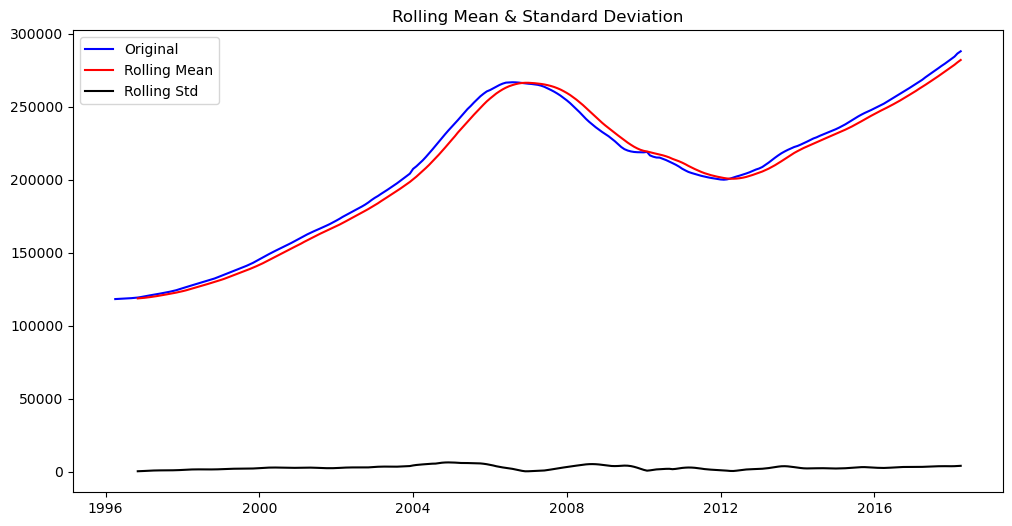

Results of Dickey-Fuller Test: 

Test Statistic                  -1.885145
p-value                          0.339082
#Lags Used                       2.000000
Number of Observations Used    262.000000
Critical Value (1%)             -3.455558
Critical Value (5%)             -2.872636
Critical Value (10%)            -2.572683
dtype: float64


In [12]:
stationarity_check(melted_df)

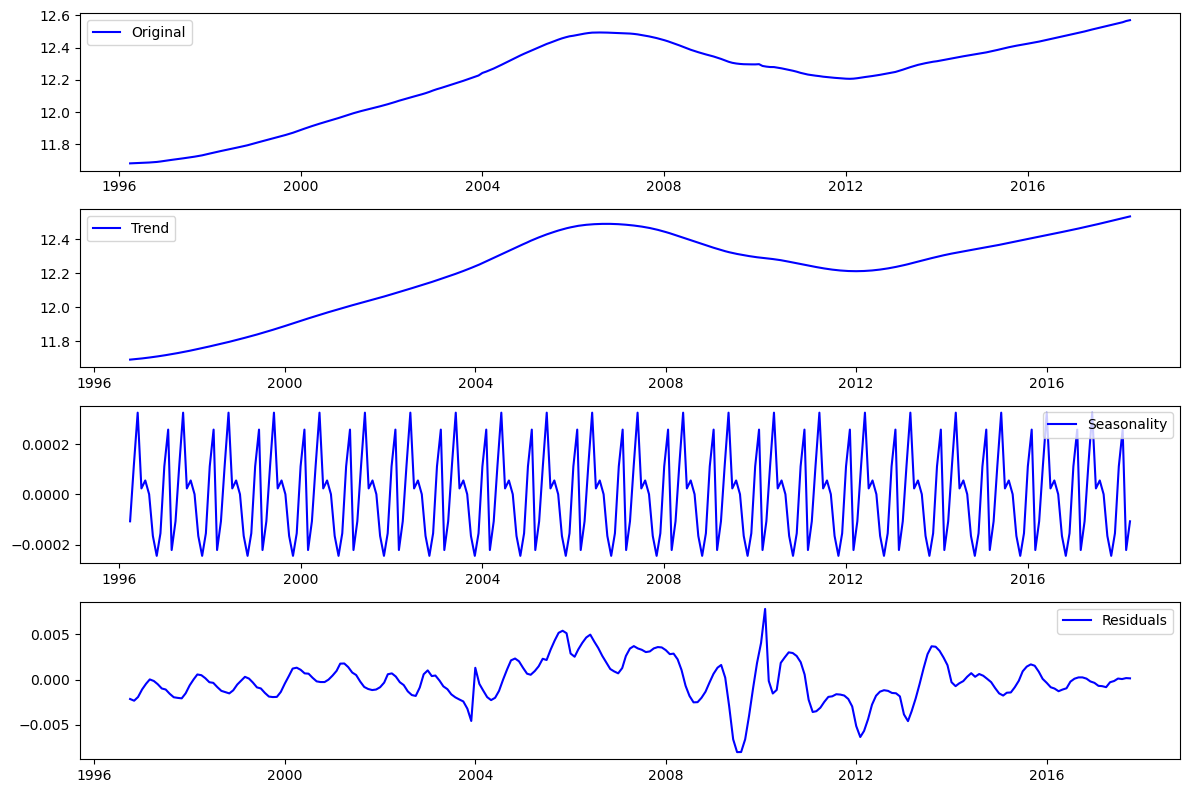

In [13]:
# Import and apply seasonal_decompose()
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(np.log(melted_df))

# Gather the trend, seasonality, and residuals 
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

# Plot gathered statistics
plt.figure(figsize=(12,8))
plt.subplot(411)
plt.plot(np.log(melted_df), label='Original', color='blue')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend', color='blue')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality', color='blue')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals', color='blue')
plt.legend(loc='best')
plt.tight_layout()

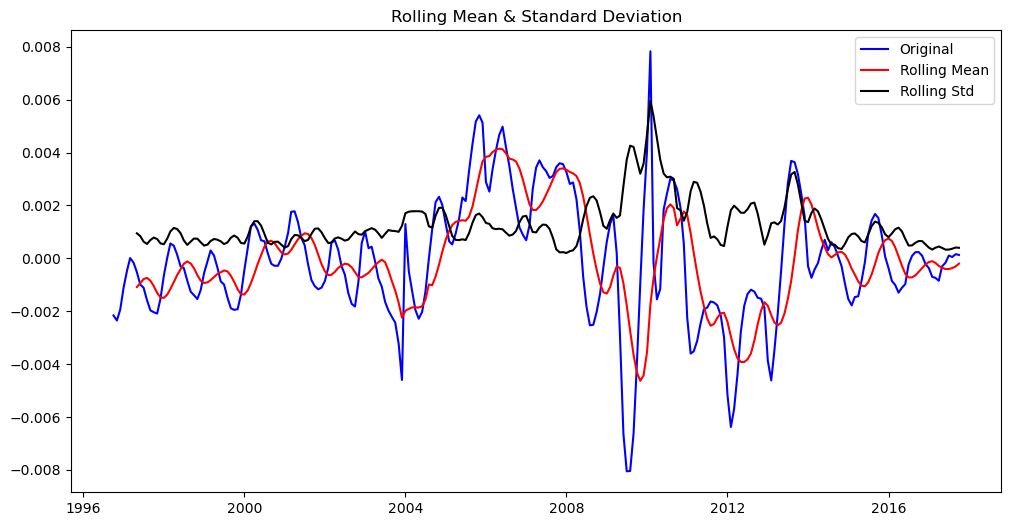

Results of Dickey-Fuller Test: 

Test Statistic                  -3.161871
p-value                          0.022301
#Lags Used                      10.000000
Number of Observations Used    242.000000
Critical Value (1%)             -3.457664
Critical Value (5%)             -2.873559
Critical Value (10%)            -2.573175
dtype: float64


In [14]:
# Drop missing values from residuals 
ts_log_decompose = residual
ts_log_decompose.dropna(inplace=True)

# Check stationarity
stationarity_check(ts_log_decompose)

* The Dickey-Fuller test statistic is significant and very well below a (strict) 0.01 mark. So it seems reasonable to assume this time series is stationary.

#### Creating the baseline model

In [16]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from math import sqrt

# Baseline ARIMA model
train_size = int(len(ts_log_decompose) * 0.8)
train, test = ts_log_decompose['2018-04'][:train_size], ts_log_decompose['2018-04'][train_size:]
model = ARIMA(train, order=(5,1,0))
model_fit = model.fit()
predictions = model_fit.forecast(steps=len(test))
rmse = sqrt(mean_squared_error(test, predictions))
print("Baseline ARIMA Model RMSE:", rmse)

KeyError: '2018-04'

#### Model Evaluation

In [77]:
# This dataframe will show us how accurate our models are 
eval_df = evaluate_models(train, test)

# Displaying the dataframe
eval_df

NameError: name 'train' is not defined

In [ ]:
# Calculating the average error using the dataframe above 
average_error = str(round(sum([int(i) for i in eval_df['% Error']]) / len(eval_df) , 2)) + '%'

# Printing the result
print(f"On average our model based predictions were {average_error} off from the observed values.")

In [ ]:
# Getting predictions from our models for September of 2021
model_predictions_2021 = generate_predictions(train, 24)

# Checking out the results
model_predictions_2021

### 7. Conclusion

### 8. Recommedation

* Obtain current data after 2018 for current predictions.
* Investigate why some of the models seem so far off in their forecasts.
